In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
df = pd.read_excel('AL.xlsx')
df.head()

,PT,stress,cycle,UTS,YS
0,Heat Treating of Aluminum Alloys,122.869198,69086.724553,218.557495,185.0
1,Heat Treating of Aluminum Alloys,123.459916,69088.293755,222.031676,190.0
2,Heat Treating of Aluminum Alloys,123.459916,69088.293755,224.346500,193.0
3,Heat Treating of Aluminum Alloys,124.345992,69090.647557,224.354281,192.3
4,Heat Treating of Aluminum Alloys,124.641350,69091.432158,228.985874,195.3


In [3]:
df.shape

(278, 5)

In [4]:
df.columns

Index(['PT', 'stress', 'cycle', 'UTS', 'YS'], dtype='object')

In [5]:
mean_stress = df['UTS'].mean()

# Replace NaNs in the 'Stress' column with the mean value
df['UTS'].fillna(mean_stress, inplace=True)

In [6]:
mean_stress = df['YS'].mean()

# Replace NaNs in the 'Stress' column with the mean value
df['YS'].fillna(mean_stress, inplace=True)

In [7]:
correlation = df['UTS'].corr(df['YS'])

print("Correlation between UTS and YS:", correlation)


Correlation between UTS and YS: 0.9928500118890549


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = df[['stress','UTS','YS']].to_numpy()
y = df['cycle'].to_numpy()
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.918035272104306

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming your features are stored in X and target variable is stored in y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate DecisionTreeRegressor with desired parameters
dt_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit DecisionTreeRegressor to the training data
dt_regressor.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = dt_regressor.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.9405300651241394


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your features are stress, strain, and UTS, and target variable is Lifetime
X = df[['stress','UTS','YS']]  # Features
y = df['cycle']     # Target variable

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize y_train and y_test
y_scaler = StandardScaler()
y_train_normalized = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = y_scaler.transform(y_test.values.reshape(-1, 1))

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 2: Train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_normalized, y_train_normalized.ravel())  # Use normalized features for training

# Step 3: Evaluate the model's performance
y_pred_normalized = random_forest.predict(X_test_normalized)  # Use normalized features for prediction
y_pred = y_scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))  # Inverse transform to get original scale

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 4541509.796597818
R-squared: 0.9907679749575139


In [11]:
X = df[['stress','UTS','YS']]
y = df['cycle']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train KNN model
k = 5  # number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Step 5: Evaluate model
y_pred = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 9775700.289724628


In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your features are stored in X and target variable is stored in y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SVR (Support Vector Regressor) with desired parameters
svr = SVR(kernel='linear', C=1.0)

# Fit SVR to the training data
svr.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = svr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 86066276.52276145
R-squared: 0.825043640604518


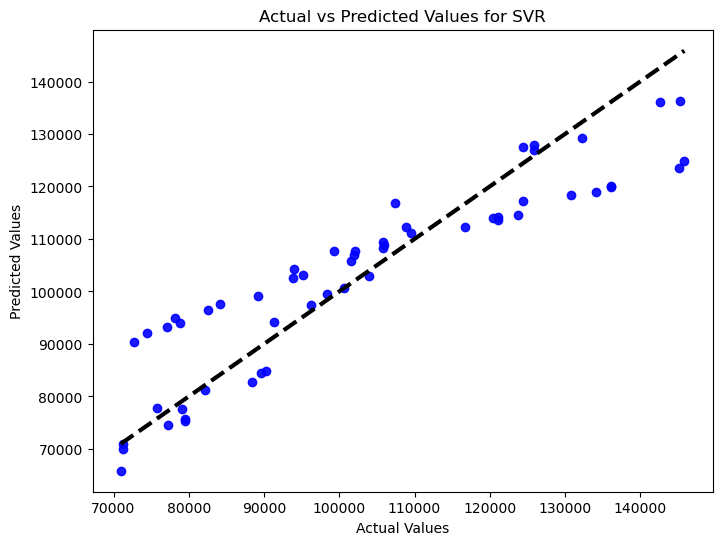

In [13]:
import matplotlib.pyplot as plt

y_pred = svr.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Plotting the diagonal line (perfect predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for SVR')
plt.show()


C:\Users\anfas\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\anfas\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\anfas\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


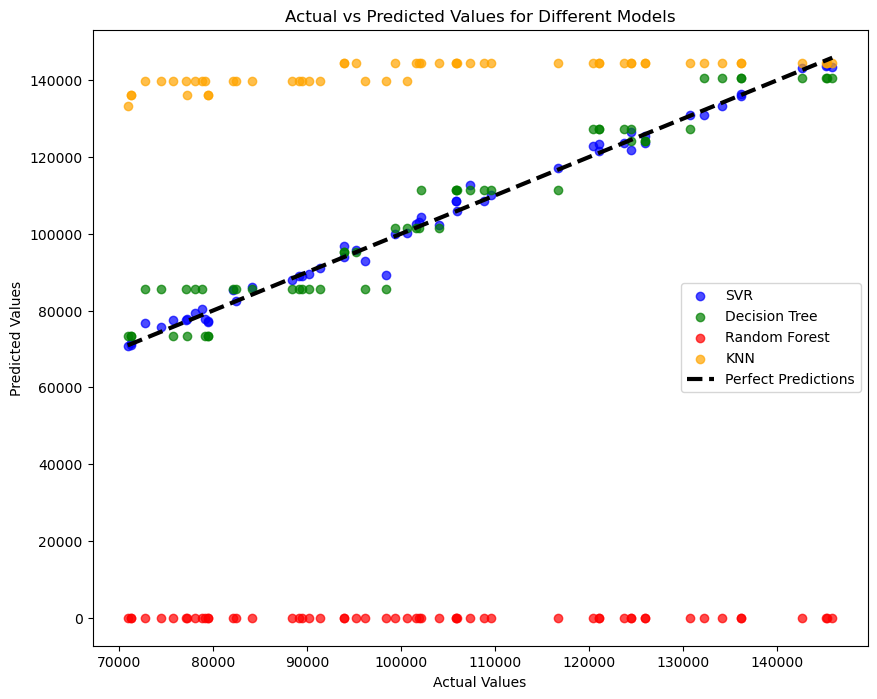

In [32]:
import matplotlib.pyplot as plt

# Get predictions for Decision Tree, Random Forest, and KNN
y_pred_dt = dt_regressor.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Plot actual vs predicted values for all models
plt.figure(figsize=(10, 8))

# SVR
plt.scatter(y_test, y_pred, color='blue', label='SVR', alpha=0.7)

# Decision Tree
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree', alpha=0.7)

# Random Forest
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest', alpha=0.7)

# KNN
plt.scatter(y_test, y_pred_knn, color='orange', label='KNN', alpha=0.7)

# Plotting the diagonal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Different Models')
plt.legend()
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming your features are stored in X and target variable is stored in y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'k-Nearest Neighbors': KNeighborsRegressor(),
    'SVR': SVR(kernel='linear')
}

r2_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores[name] = r2_score(y_test, y_pred)

# Print R-squared scores
for name, score in r2_scores.items():
    print(f"{name}: {score}")


Decision Tree: 0.9927368147760695
Random Forest: 0.9907520477107193
Linear Regression: 0.9095277820335693
k-Nearest Neighbors: 0.9856310128458747
SVR: 0.825043640604518


In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [222, 56]

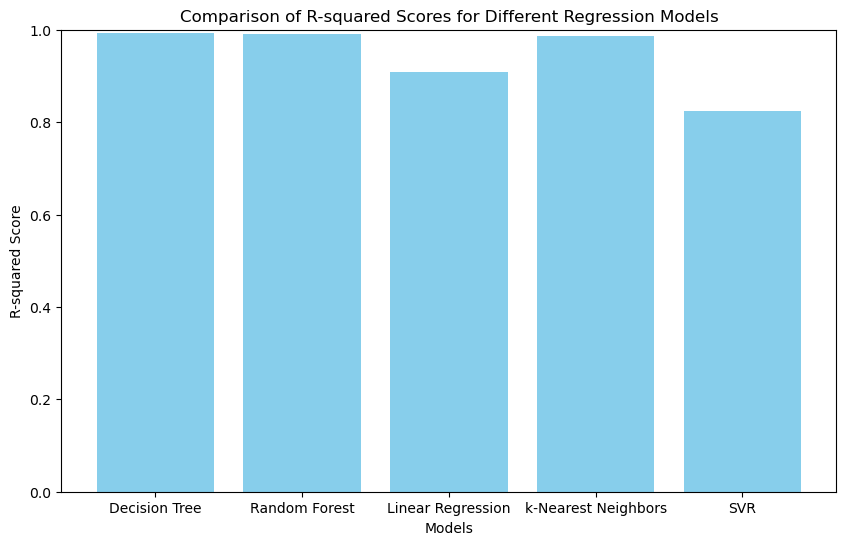

In [15]:
models = ['Decision Tree', 'Random Forest', 'Linear Regression', 'k-Nearest Neighbors', 'SVR']
scores = [r2_scores[model] for model in models]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Different Regression Models')
plt.ylim(0, 1)  # Limiting y-axis to (0, 1) for better visualization
plt.show()

<AxesSubplot:>

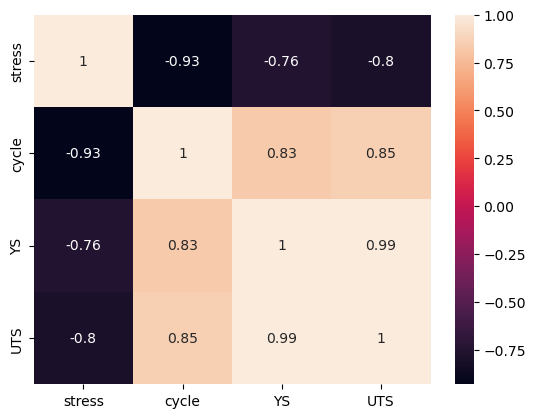

In [16]:
df_1 =df[['stress','cycle','YS','UTS']]
import seaborn as sns
sns.heatmap(df_1.corr(),annot= True)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your features are stress, strain, and UTS, and target variable is Lifetime
X = df[['stress','UTS','YS']]  # Features
y = df['cycle']     # Target variable

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
y_scaler = MinMaxScaler()
y_train_normalized = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = y_scaler.transform(y_test.values.reshape(-1, 1))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 2: Train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_normalized, y_train)  # Use normalized features for training

# Step 3: Evaluate the model's performance
y_pred = random_forest.predict(X_test_normalized)  # Use normalized features for prediction
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 4548105.8597514555
R-squared: 0.9907545664165345


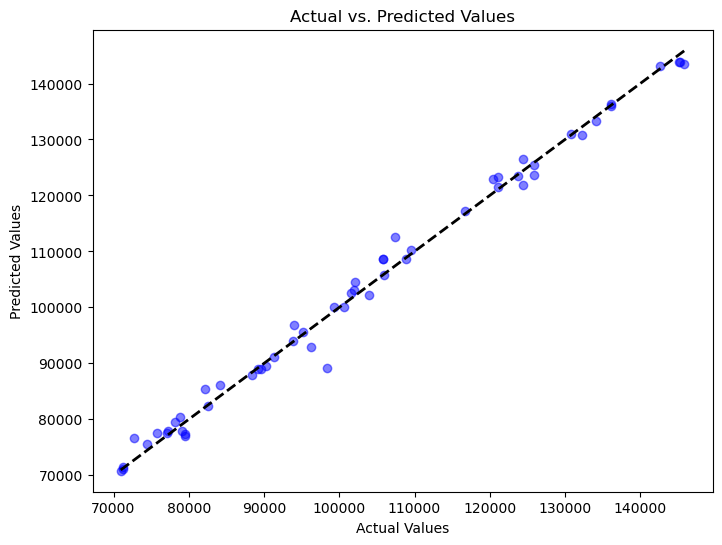

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

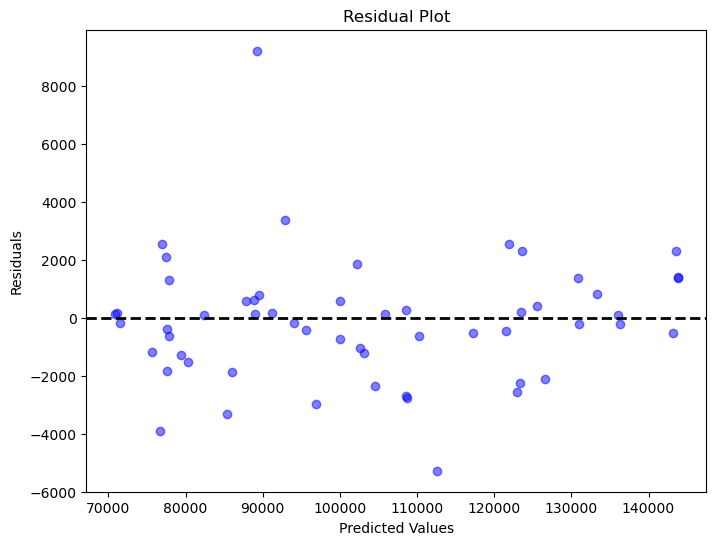

In [19]:
residuals = y_test - y_pred.ravel()

# Plot residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)  # Plot horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

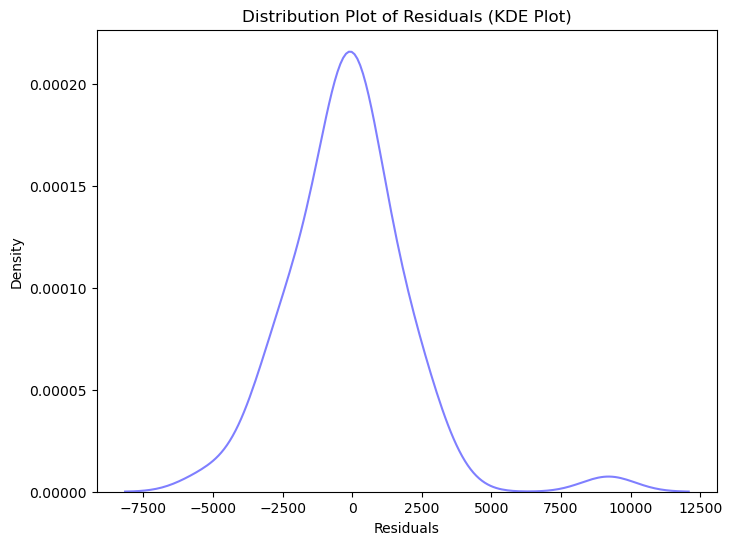

In [20]:
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution Plot of Residuals (KDE Plot)')
plt.show()

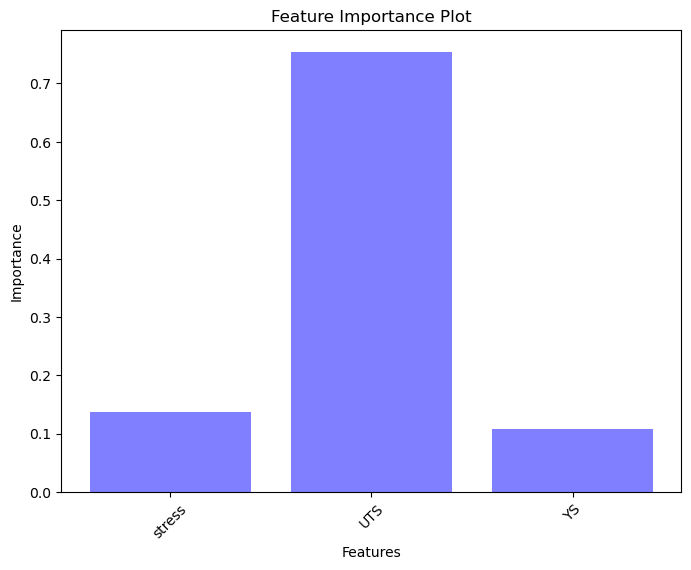

In [21]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_normalized, y_train_normalized.ravel())

# Get feature importances
importances = random_forest.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='blue', alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45)
plt.show()


C:\Users\anfas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


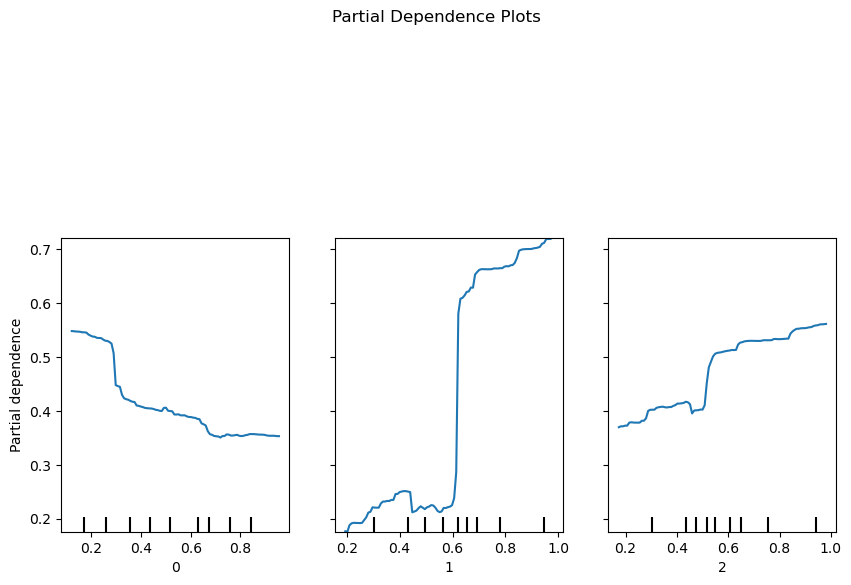

In [22]:
from sklearn.inspection import plot_partial_dependence

# Plot partial dependence plots
fig, ax = plt.subplots(figsize=(10, 6))
plot_partial_dependence(random_forest, X_train_normalized, features=[0, 1, 2], ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.6)
plt.show()


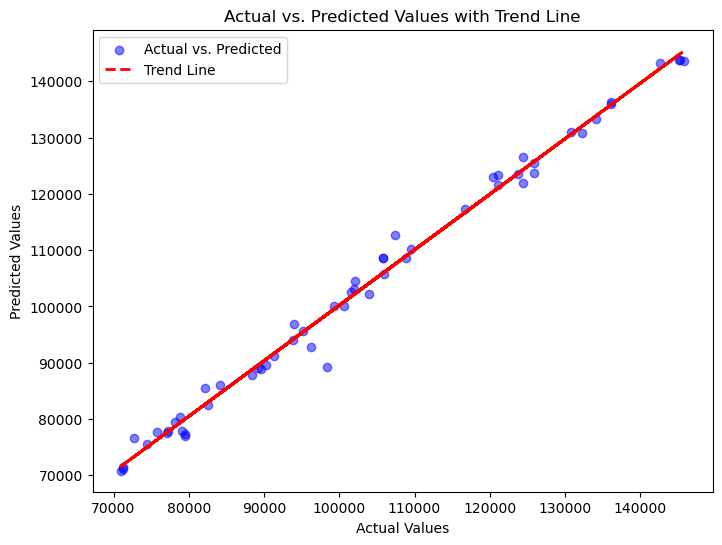

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Add trend line
z = np.polyfit(y_test, y_pred.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linestyle='--', linewidth=2, label='Trend Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Trend Line')
plt.legend()
plt.show()


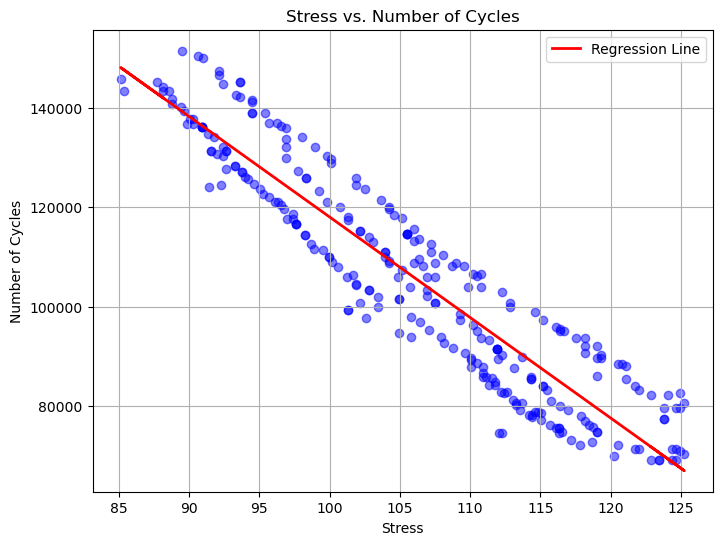

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is df with columns 'Stress' and 'No_of_cycle'
stress = df['stress'].values.reshape(-1, 1)  # Reshape stress for sklearn
no_of_cycle = df['cycle']

# Fit linear regression model
model = LinearRegression()
model.fit(stress, no_of_cycle)

# Generate predictions
predictions = model.predict(stress)

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(stress, no_of_cycle, color='blue', alpha=0.5)
plt.plot(stress, predictions, color='red', linewidth=2, label='Regression Line')
plt.title('Stress vs. Number of Cycles')
plt.xlabel('Stress')
plt.ylabel('Number of Cycles')
plt.grid(True)
plt.legend()
plt.show()


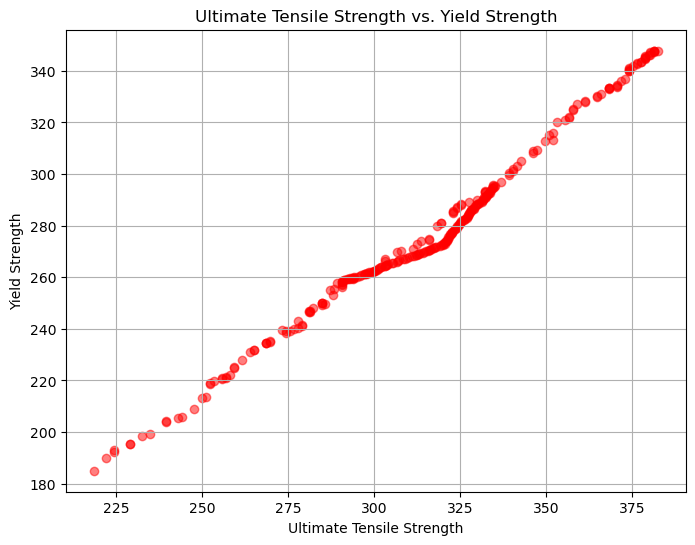

In [145]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is df with columns 'Yield_Strength' and 'Ultimate_Tensile_Strength'
ys = df['YS']
uts = df['UTS']

plt.figure(figsize=(8, 6))
plt.scatter(uts, ys, color='red', alpha=0.5)
plt.title('Ultimate Tensile Strength vs. Yield Strength')
plt.xlabel('Ultimate Tensile Strength')
plt.ylabel('Yield Strength')
plt.grid(True)
plt.show()


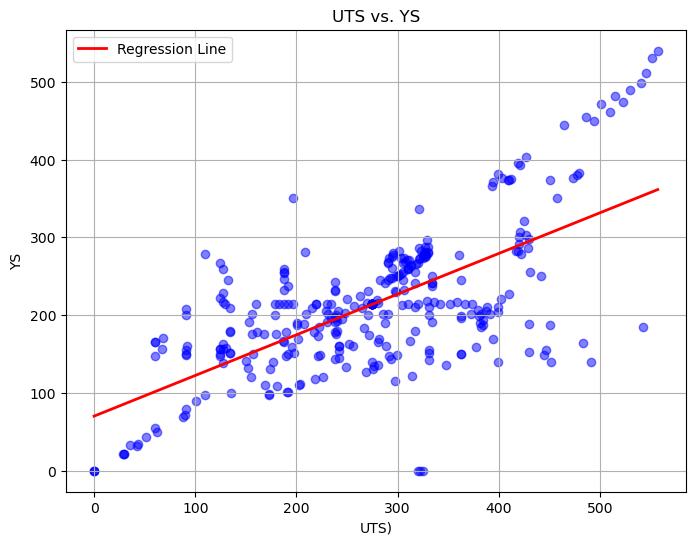

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is df with columns 'YS' and 'UTS'
ys = df['YS'].values.reshape(-1, 1)  # Reshape to 2D array for sklearn
uts = df['UTS']

# Fit linear regression model
model = LinearRegression()
model.fit(uts.values.reshape(-1, 1), ys)

# Generate points for the regression line
uts_range = np.linspace(min(uts), max(uts), 100).reshape(-1, 1)
ys_pred = model.predict(uts_range)

# Plot scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(uts, ys, color='blue', alpha=0.5)
plt.plot(uts_range, ys_pred, color='red', linewidth=2, label='Regression Line')
plt.title('UTS vs. YS')
plt.xlabel('UTS)')
plt.ylabel('YS')
plt.legend()
plt.grid(True)
plt.show()


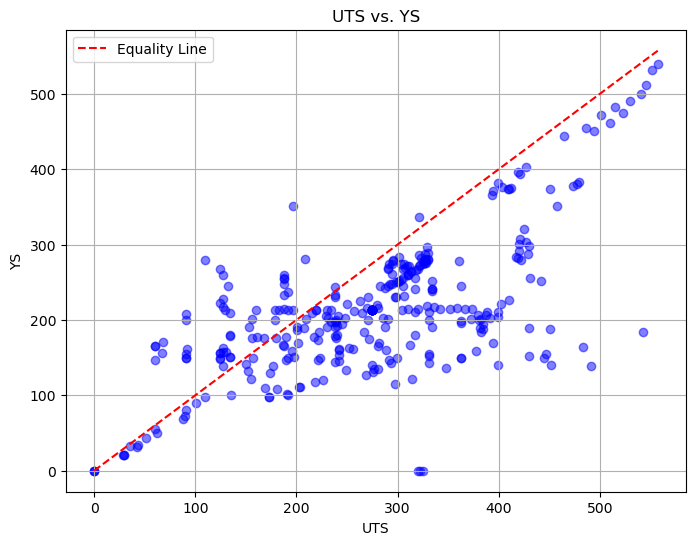

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame is df with columns 'YS' and 'UTS'
ys = df['YS']
uts = df['UTS']

plt.figure(figsize=(8, 6))
plt.scatter(uts, ys, color='blue', alpha=0.5)
plt.plot([0, max(uts)], [0, max(uts)], color='red', linestyle='--', label='Equality Line')  # Plot the equality line
plt.title('UTS vs. YS')
plt.xlabel('UTS')
plt.ylabel('YS')
plt.legend()
plt.grid(True)
plt.show()


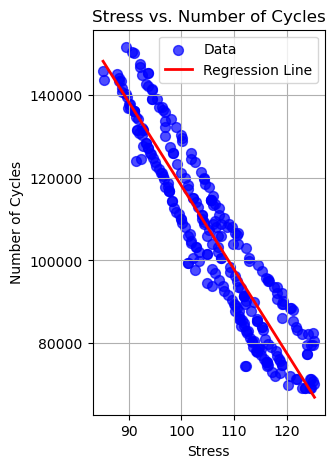

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is df with columns 'Stress' and 'No_of_cycle'
stress = df['stress']
no_of_cycle = df['cycle']

# Fit linear regression model
model = LinearRegression()
model.fit(stress.values.reshape(-1, 1), no_of_cycle)

# Generate points for the regression line
stress_range = np.linspace(min(stress), max(stress), 100).reshape(-1, 1)
no_of_cycle_pred = model.predict(stress_range)

# Plot scatter plot and regression line
plt.figure(figsize=(3, 5
                   ))
plt.scatter(stress, no_of_cycle, color='blue', alpha=0.7, label='Data', s=50)  # Increase marker size (s)
plt.plot(stress_range, no_of_cycle_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Stress vs. Number of Cycles')
plt.xlabel('Stress')
plt.ylabel('Number of Cycles')
plt.legend()
plt.grid(True)
plt.show()


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming your features are stored in X and target variable is stored in y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(kernel='linear'),
    'k-Nearest Neighbors': KNeighborsRegressor()
}

# Calculate R-squared for each model
r2_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores[name] = r2_score(y_test, y_pred)

# Print R-squared scores
for name, score in r2_scores.items():
    print(f"{name}: {score}")


Linear Regression: 0.9095277820335693
Random Forest: 0.9907520477107193
Decision Tree: 0.9927368147760695
SVR: 0.825043640604518
k-Nearest Neighbors: 0.9856310128458747
